In [1]:
import pandas as pd

In [2]:
Fake_df = pd.read_csv(r'D:\FakeNewsDetection\data\Fake.csv')
Real_df = pd.read_csv(r'D:\FakeNewsDetection\data\True.csv') 

In [3]:
Fake_df['label'] = 0
Real_df['label'] = 1

In [4]:

Fake_df.head()

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


In [5]:
Real_df.head()

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


In [6]:
df = pd.concat([Fake_df, Real_df], ignore_index=True)

In [7]:
df.head()

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


In [8]:
df.shape

(44898, 5)

In [9]:
df.isna().sum()

title      0
text       0
subject    0
date       0
label      0
dtype: int64

In [10]:
df['label'].value_counts()  

label
0    23481
1    21417
Name: count, dtype: int64

In [11]:
df['subject'].value_counts()

subject
politicsNews       11272
worldnews          10145
News                9050
politics            6841
left-news           4459
Government News     1570
US_News              783
Middle-east          778
Name: count, dtype: int64

# Text Cleaning

In [ ]:
# Text Cleaning
df['cleaned_text']=df['text'].str.lower()  

In [16]:
import re
def clean_text(text):
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)  
    text = re.sub(r'\@\w+|\#', '', text)  
    text = re.sub(r'[^\w\s]', '', text)  
    text = re.sub(r'\d+', '', text)  
    return text

In [17]:
df['cleaned_text'] = df['cleaned_text'].apply(clean_text)

In [18]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
df['cleaned_text'] = df['cleaned_text'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))

In [19]:
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()
df['cleaned_text'] = df['cleaned_text'].apply(lambda x: ' '.join([stemmer.stem(word) for word in x.split()]))

In [20]:
df[['text', 'cleaned_text']].head()

,text,cleaned_text
0,Donald Trump just couldn t wish all Americans ...,donald trump wish american happi new year leav...
1,House Intelligence Committee Chairman Devin Nu...,hous intellig committe chairman devin nune go ...
2,"On Friday, it was revealed that former Milwauk...",friday reveal former milwauke sheriff david cl...
3,"On Christmas day, Donald Trump announced that ...",christma day donald trump announc would back w...
4,Pope Francis used his annual Christmas Day mes...,pope franci use annual christma day messag reb...


In [21]:
# Save the cleaned DataFrame
new_df = df[['title','text','subject','date', 'label','cleaned_text']]

In [22]:
new_df.to_csv(r'D:\FakeNewsDetection\data\cleaned_data.csv', index=False)  

# Vectorization

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(new_df['cleaned_text'])
print(vectorizer.get_feature_names_out()[:10]) 

['_____' '_______' '_________________________'
 '__________________________' '___________the' '_____burn'
 '___supportsdonaldtrump' '_all_' '_anyone_' '_bigger_']


In [26]:
vectorize = CountVectorizer()
X_count = vectorize.fit_transform(new_df['cleaned_text'])

In [30]:
print(vectorize.get_feature_names_out()[:10])

['_____' '_______' '_________________________'
 '__________________________' '___________the' '_____burn'
 '___supportsdonaldtrump' '_all_' '_anyone_' '_bigger_']


In [32]:
print(X.shape) 
print(X_count.shape)

(44898, 171736)
(44898, 171736)


# Modeling

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [35]:
# Logistic Regression on tf-idf features
X_train, X_test, y_train, y_test = train_test_split(X, new_df['label'], test_size=0.2, random_state=42)
log_reg = LogisticRegression()

In [36]:
log_reg.fit(X_train, y_train)

LogisticRegression()

In [37]:
predictions_log_reg = log_reg.predict(X_test)

In [47]:
print("accuracy score using logistic regression and tfidf vectorizer",accuracy_score(y_test, predictions_log_reg))

accuracy score using logistic regression and tfidf vectorizer 0.9842984409799554


In [39]:
# logistic regression uaing count vectorizer
X_train_count, X_test_count, y_train_count, y_test_count = train_test_split(X_count, new_df['label'], test_size=0.2, random_state=42)
log_reg_count = LogisticRegression()

In [40]:
log_reg_count.fit(X_train_count, y_train_count)

LogisticRegression()

In [41]:
predictions_log_reg_count = log_reg_count.predict(X_test_count)

In [45]:
print("accuracy score using logistic regression and count vectorize", accuracy_score(y_test_count, predictions_log_reg_count))

accuracy score using logistic regression and count vectorize 0.9965478841870824


In [48]:
# NAive Bayes on tf-idf features
nb = MultinomialNB()
nb.fit(X_train, y_train)

MultinomialNB()

In [49]:
prefictions_nb = nb.predict(X_test)

In [50]:
print("accuracy score using Naive Bayes and tfidf vectorizer", accuracy_score(y_test, prefictions_nb))

accuracy score using Naive Bayes and tfidf vectorizer 0.9338530066815145


In [51]:
#NAive Bayes on count vectorizer features
nb_count = MultinomialNB()
nb_count.fit(X_train_count, y_train_count)

MultinomialNB()

In [52]:
prediction_nb_count = nb_count.predict(X_test_count)

In [53]:
print("accuracy score using naive bayes and count vectorizer", accuracy_score(y_test_count, prediction_nb_count))

accuracy score using naive bayes and count vectorizer 0.9532293986636972


In [54]:
confusion_matrix_log_reg = confusion_matrix(y_test, predictions_log_reg)
print("Confusion Matrix for Logistic Regression (TF-IDF):\n", confusion_matrix_log_reg)

Confusion Matrix for Logistic Regression (TF-IDF):
 [[4659   74]
 [  67 4180]]


In [55]:
confusin_matrix_log_reg_count = confusion_matrix(y_test_count, predictions_log_reg_count)
print("Confusion Matrix for Logistic Regression (Count Vectorizer):\n", confusin_matrix_log_reg_count)

Confusion Matrix for Logistic Regression (Count Vectorizer):
 [[4719   14]
 [  17 4230]]


In [57]:
confusion_matrix_nb = confusion_matrix(y_test, prefictions_nb)
print("Confusion Matrix for Naive Bayes (TF-IDF):\n", confusion_matrix_nb)

Confusion Matrix for Naive Bayes (TF-IDF):
 [[4428  305]
 [ 289 3958]]


In [58]:
confusion_matrix_nb_count = confusion_matrix(y_test_count, prediction_nb_count)
print("Confusion Matrix for Naive Bayes (Count Vectorizer):\n", confusion_matrix_nb_count)

Confusion Matrix for Naive Bayes (Count Vectorizer):
 [[4496  237]
 [ 183 4064]]


In [60]:
import matplotlib.pyplot as plt
import seaborn as sns

Text(0, 0.5, 'Count')

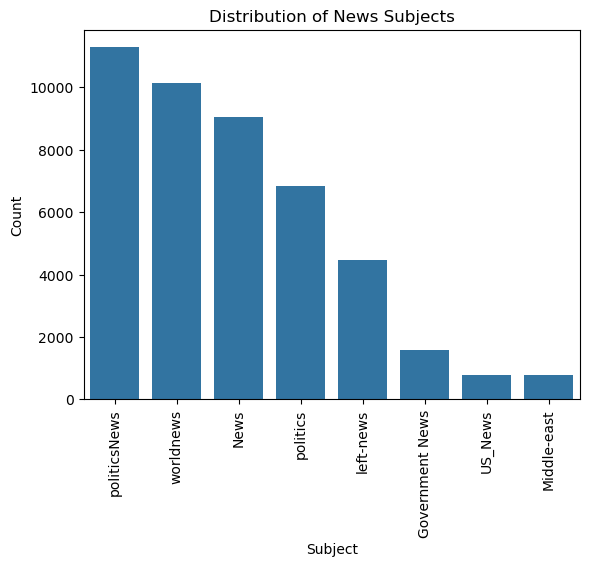

In [66]:
sns.barplot(x=new_df['subject'].value_counts().index, y=new_df['subject'].value_counts().values)
plt.xticks(rotation=90)
plt.title('Distribution of News Subjects')
plt.xlabel('Subject')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

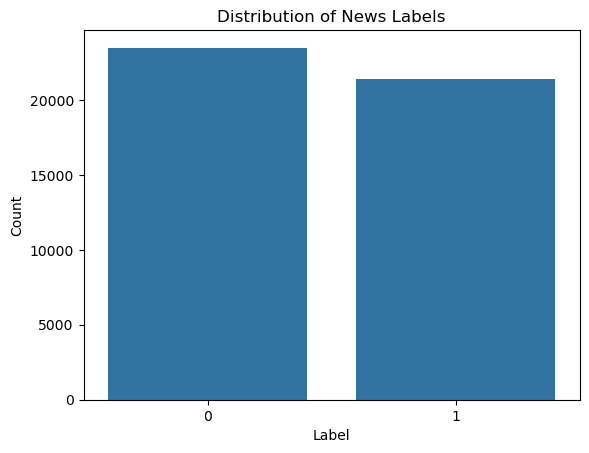

In [68]:
sns.barplot(x=new_df['label'].value_counts().index, y=new_df['label'].value_counts().values )
plt.title('Distribution of News Labels')
plt.xlabel('Label') 
plt.ylabel('Count')

In [74]:
#Article Length Analysis
new_df["word_count"] = new_df["cleaned_text"].apply(lambda x: len(str(x).split()))
new_df.groupby("label")["word_count"].describe()


,count,mean,std,min,25%,50%,75%,max
label,,,,,,,,
0,23481.0,229.446105,229.516393,0.0,131.0,195.0,271.0,4841.0
1,21417.0,226.623150,159.098964,0.0,87.0,211.0,306.0,2453.0


<Axes: xlabel='label', ylabel='word_count'>

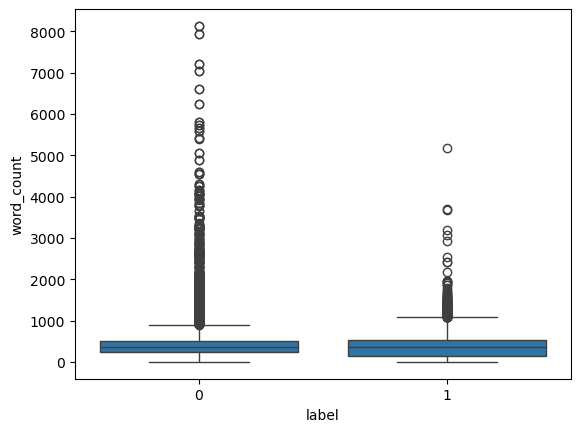

In [72]:
import seaborn as sns
sns.boxplot(x="label", y="word_count", data=df)


In [ ]:
from 

0        donald trump wish american happi new year leav...
1        hous intellig committe chairman devin nune go ...
2        friday reveal former milwauke sheriff david cl...
3        christma day donald trump announc would back w...
4        pope franci use annual christma day messag reb...
                               ...                        
44893    brussel reuter nato alli tuesday welcom presid...
44894    london reuter lexisnexi provid legal regulator...
44895    minsk reuter shadow disus sovietera factori mi...
44896    moscow reuter vatican secretari state cardin p...
44897    jakarta reuter indonesia buy sukhoi fighter je...
Name: cleaned_text, Length: 44898, dtype: object

In [78]:
sentiment_df = new_df

Text(0, 0.5, 'Count')

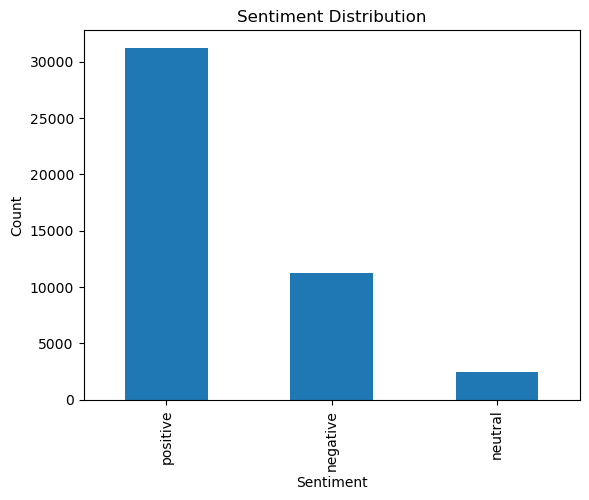

In [81]:
from textblob import TextBlob
def get_sentiment(text):
    analysis = TextBlob(text)
    if analysis.sentiment.polarity > 0:
        return 'positive'
    elif analysis.sentiment.polarity < 0:
        return 'negative'
    else:
        return 'neutral'
    
sentiment_df['sentiment'] = sentiment_df['cleaned_text'].apply(get_sentiment)
sentiment_df['sentiment'].value_counts().plot(kind='bar')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment') 
plt.ylabel('Count')

In [82]:
sentiment_df.to_csv(r'D:\FakeNewsDetection\data\sentiment_data.csv', index=False)
sentiment_df.head()

,title,text,subject,date,label,cleaned_text,article_length,word_count,sentiment
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0,donald trump wish american happi new year leav...,245,245,positive
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0,hous intellig committe chairman devin nune go ...,178,178,positive
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0,friday reveal former milwauke sheriff david cl...,301,301,negative
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0,christma day donald trump announc would back w...,235,235,negative
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0,pope franci use annual christma day messag reb...,211,211,negative
